In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
years_twodim = [2013, 2014, 2015]
years_threedim = [2009, 2012, 2012, 2012, 2013, 2013, 2014, 2015, 2018, 2018, 2018, 2019]
twodim_MOFs = [160, 40, 1580]
threedim_MOFs = [6E-4, 1E-4, 1E-6, 7.7E-5, 3.9E-6, 3.2E-7, 0.07, 0.16, 1.8, 0.45, 1.57, 10.96]
annotations_twodim = ["Ni$_3$(BHT)$_2$", "Ni$_3$(HITP)$_2$", "Cu$_3$(BHT)$_2$"]
annotations_threedim = ["Cu[Cu(PDT)$_2$]", "Cd$_2$(TTFTB)", "Zn$_2$(TTFTB)", "Fe(1,2,3-triazolate)$_2$", "Fe$_2$(DSBDC)", 
                        "Fe$_2$(DOBDC)", "TCNQ@HKUST-1", "Fe$_2$(DHBQ)$_3$", "Fe$_2$(BDT)$_3$", "V$_2$(Cl$_2$(DHBQ))$_3$", 
                        "Co(HAB)", "Cu$_2$(6-Hmna)(6-mn)"]

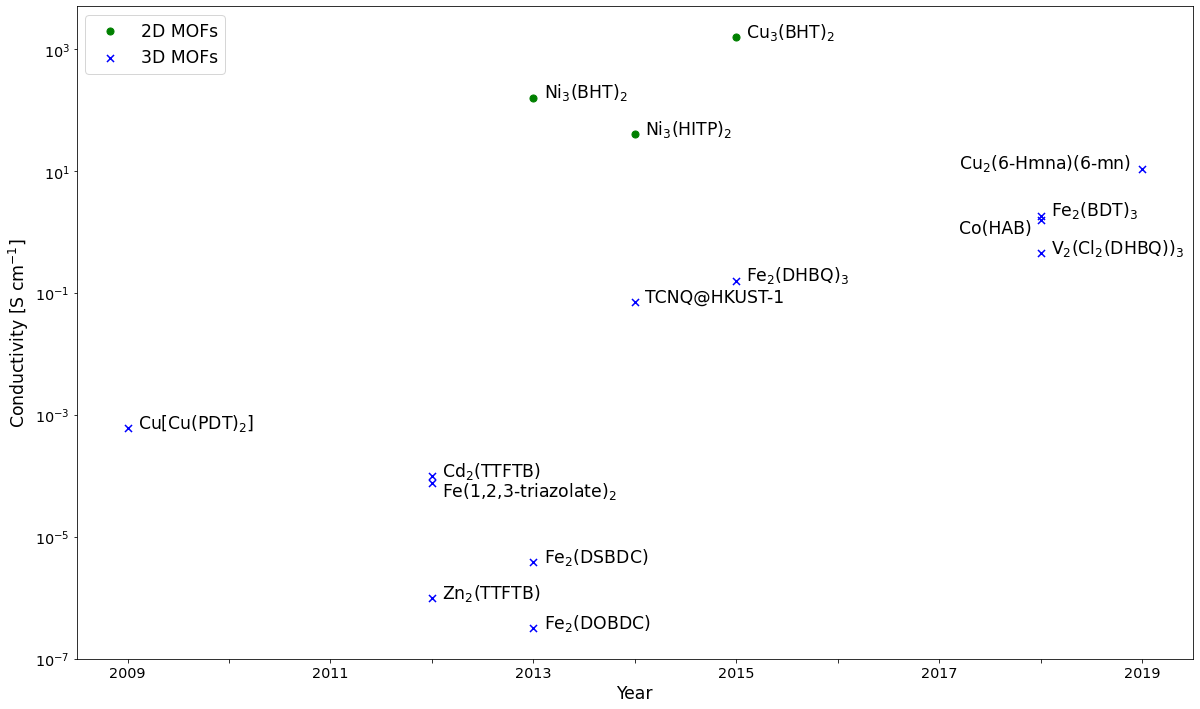

In [31]:
plt.figure(figsize=(20,12))
plt.scatter(years_twodim,twodim_MOFs, label='2D MOFs', color='g', s=50, marker="o")
plt.scatter(years_threedim,threedim_MOFs, label='3D MOFs', color='b', s=50, marker="x")
plt.yscale('log')
plt.ylim(0.0000001,5000)
plt.ylabel("Conductivity [S cm$^{-1}$]", fontsize='xx-large')
plt.tick_params(axis='y',labelsize='x-large')
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], ["2009","","2011", "", "2013", "", "2015", "", "2017", "", "2019"], fontsize='x-large')
plt.xlabel("Year", fontsize='xx-large')
plt.annotate(annotations_threedim[0], (years_threedim[0]+0.1,threedim_MOFs[0]), fontsize='xx-large')
plt.annotate(annotations_threedim[1], (years_threedim[1]+0.1,threedim_MOFs[1]), fontsize='xx-large')
plt.annotate(annotations_threedim[2], (years_threedim[2]+0.1,threedim_MOFs[2]), fontsize='xx-large')
plt.annotate(annotations_threedim[3], (years_threedim[3]+0.1,threedim_MOFs[3]-0.00003), fontsize='xx-large')
plt.annotate(annotations_threedim[4], (years_threedim[4]+0.1,threedim_MOFs[4]), fontsize='xx-large')
plt.annotate(annotations_threedim[5], (years_threedim[5]+0.1,threedim_MOFs[5]), fontsize='xx-large')
plt.annotate(annotations_threedim[6], (years_threedim[6]+0.1,threedim_MOFs[6]), fontsize='xx-large')
plt.annotate(annotations_threedim[7], (years_threedim[7]+0.1,threedim_MOFs[7]), fontsize='xx-large')
plt.annotate(annotations_threedim[8], (years_threedim[8]+0.1,threedim_MOFs[8]+0.1), fontsize='xx-large')
plt.annotate(annotations_threedim[9], (years_threedim[9]+0.1,threedim_MOFs[9]), fontsize='xx-large')
plt.annotate(annotations_threedim[10], (years_threedim[10]-0.8,threedim_MOFs[10]-0.6), fontsize='xx-large')
plt.annotate(annotations_threedim[11], (years_threedim[11]-1.8,threedim_MOFs[11]), fontsize='xx-large')

plt.annotate(annotations_twodim[0], (years_twodim[0]+0.1,twodim_MOFs[0]), fontsize='xx-large')
plt.annotate(annotations_twodim[1], (years_twodim[1]+0.1,twodim_MOFs[1]), fontsize='xx-large')
plt.annotate(annotations_twodim[2], (years_twodim[2]+0.1,twodim_MOFs[2]), fontsize='xx-large')

plt.legend(loc='upper left', fontsize='xx-large')
plt.savefig("MOFConductivities", dpi=300)

In [77]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from numpy import nan
import plotly.express as px
import chart_studio

In [126]:
mofs = pd.read_excel('Conductivites_Data.xlsx')
mofs['Porosity'] = [row if row>0 else 0.001 for row in mofs['BET']]

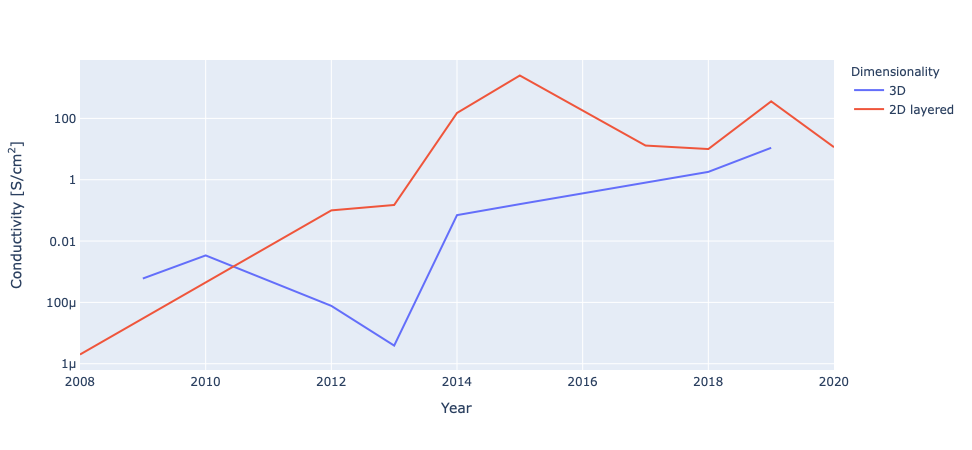

In [36]:
mofs_sorted_2D = mofs.loc[mofs[mofs['Dimensionality']=='2D layered'].groupby('Year')['Value'].idxmax()]
mofs_sorted_3D = mofs.loc[mofs[mofs['Dimensionality']=='3D'].groupby('Year')['Value'].idxmax()]
mofs_sorted = pd.concat([mofs_sorted_3D, mofs_sorted_2D], ignore_index=True)
fig2 = px.line(mofs_sorted, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig2.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig2.update_layout(yaxis_type="log")
fig2.show()

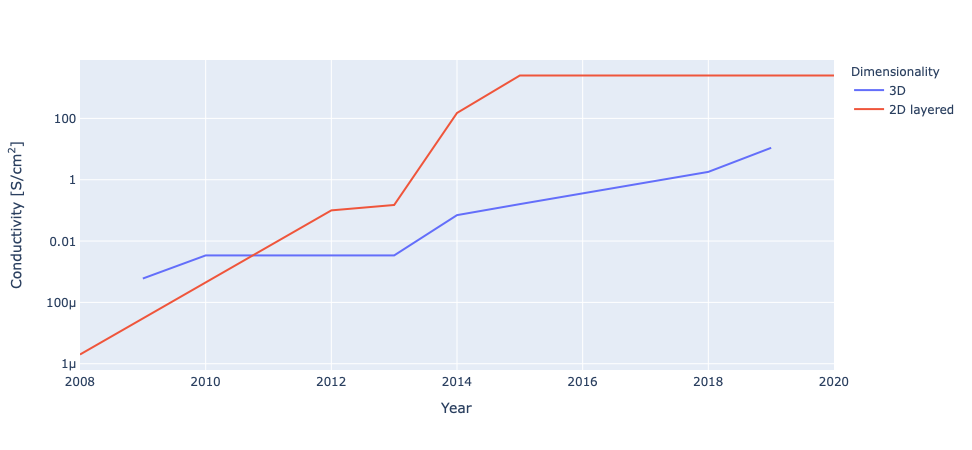

In [134]:
mofs_sorted_3D_cummax = mofs_sorted_3D
mofs_sorted_3D_cummax['cummax_value'] = mofs_sorted_3D_cummax.Value.cummax()
keep_3D = mofs_sorted_3D_cummax['cummax_value']<=mofs_sorted_3D_cummax.Value
mofs_sorted_3D_cummax.loc[~keep_3D, ['Value', 'Name', 'Pathway', 'DOI', 'Porosity']] = nan
mofs_sorted_3D_cummax = mofs_sorted_3D_cummax.ffill()
#mofs_sorted_3D_cummax = mofs_sorted_3D_cummax[keep_3D]

mofs_sorted_2D_cummax = mofs_sorted_2D
mofs_sorted_2D_cummax['cummax_value'] = mofs_sorted_2D_cummax.Value.cummax()
keep_2D = mofs_sorted_2D_cummax['cummax_value']<=mofs_sorted_2D_cummax.Value
mofs_sorted_2D_cummax.loc[~keep_2D, ['Value', 'Name', 'Pathway', 'DOI', 'Porosity']] = nan
mofs_sorted_2D_cummax = mofs_sorted_2D_cummax.ffill()
#mofs_sorted_2D_cummax = mofs_sorted_2D_cummax[keep_2D]

mofs_sorted_cummax = pd.concat([mofs_sorted_3D_cummax, mofs_sorted_2D_cummax], ignore_index=True)

fig5 = px.line(mofs_sorted_cummax, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig5.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig5.update_layout(yaxis_type="log")
fig5.show()

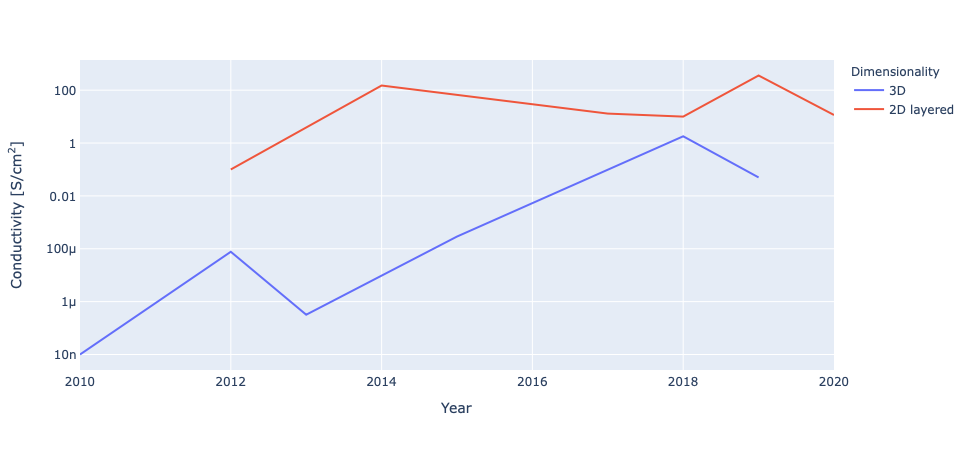

In [70]:
mofs_sorted_3D_porous = mofs.loc[mofs[(mofs['Dimensionality']=='3D') & (mofs['Porosity']>100)].groupby('Year')['Value'].idxmax()]
mofs_sorted_2D_porous = mofs.loc[mofs[(mofs['Dimensionality']=='2D layered') & (mofs['Porosity']>100)].groupby('Year')['Value'].idxmax()]
mofs_sorted_porous = pd.concat([mofs_sorted_3D_porous, mofs_sorted_2D_porous], ignore_index=True)
fig3 = px.line(mofs_sorted_porous, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig3.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig3.update_layout(yaxis_type="log")
fig3.show()

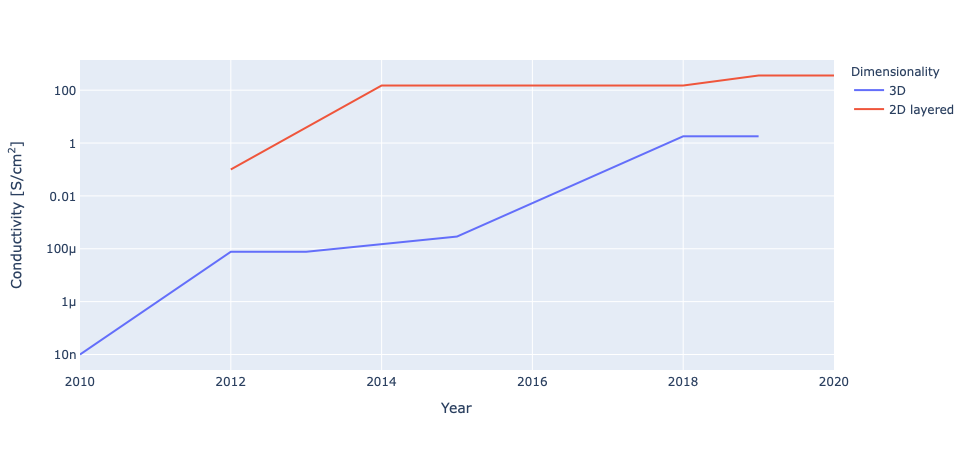

In [133]:
#mofs_sorted_3D_porous['cummax_value'] = mofs_sorted_3D_porous.Value.cummax()
#mofs_sorted_3D_porous.merge(mofs_sorted_3D_porous.groupby('cummax_value')[['Name', 'Porosity']].first(), on='cummax_value')
mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous
mofs_sorted_3D_porous_cummax['cummax_value'] = mofs_sorted_3D_porous_cummax.Value.cummax()
keep_3D_porous = mofs_sorted_3D_porous_cummax['cummax_value']<=mofs_sorted_3D_porous_cummax.Value
mofs_sorted_3D_porous_cummax.loc[~keep_3D_porous, ['Value', 'Name', 'Pathway', 'DOI', 'Porosity']] = nan
mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous_cummax.ffill()
#mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous_cummax[keep_3D_porous]

mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous
mofs_sorted_2D_porous_cummax['cummax_value'] = mofs_sorted_2D_porous_cummax.Value.cummax()
keep_2D_porous = mofs_sorted_2D_porous_cummax['cummax_value']<=mofs_sorted_2D_porous_cummax.Value
mofs_sorted_2D_porous_cummax.loc[~keep_2D_porous, ['Value', 'Name', 'Pathway', 'DOI', 'Porosity']] = nan
mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous_cummax.ffill()
#mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous_cummax[keep_2D_porous]

mofs_sorted_porous_cummax = pd.concat([mofs_sorted_3D_porous_cummax, mofs_sorted_2D_porous_cummax], ignore_index=True)
fig4 = px.line(mofs_sorted_porous_cummax, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig4.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig4.update_layout(yaxis_type="log")
fig4.show()

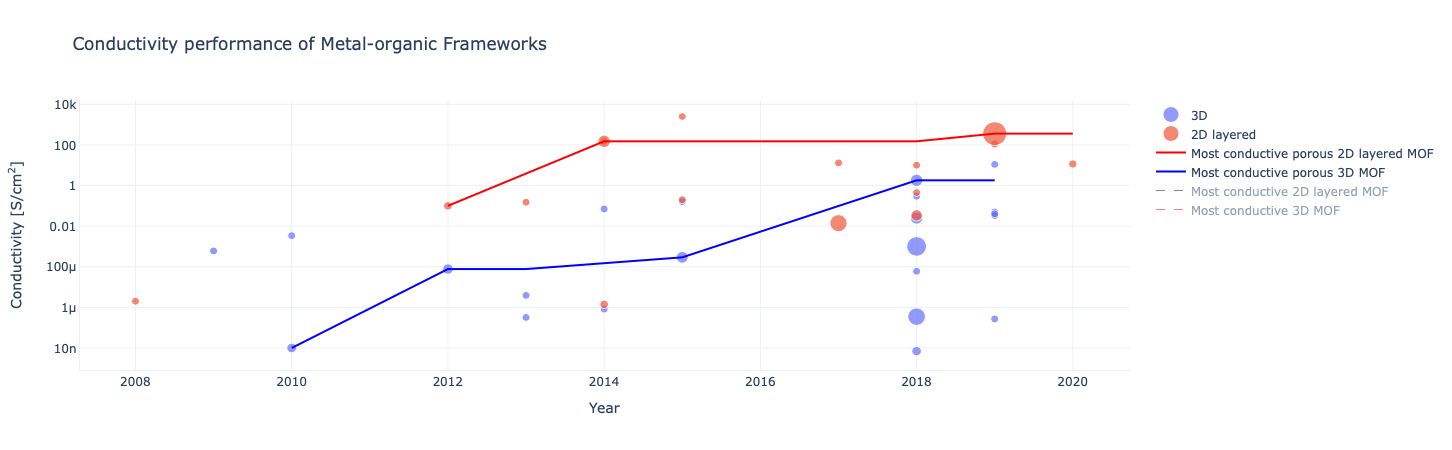

In [176]:
fig = px.scatter(mofs, x='Year', y=mofs['Value'],
                 hover_name='Name', color='Dimensionality', size='Porosity', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, template='plotly_white', 
                 title='Conductivity performance of Metal-organic Frameworks')

fig.update_traces(marker=dict(sizemin=4, sizeref=8))
fig.update_layout(yaxis_type="log")
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality: %{customdata[0]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm<sup>2</sup>\
                                 <br>BET: %{customdata[1]} m<sup>2</sup>/g<extra></extra>')

fig.add_trace(go.Scatter(x=mofs_sorted_2D_porous_cummax['Year'], y=mofs_sorted_2D_porous_cummax['Value'], 
                         name='Most conductive porous 2D layered MOF', line=dict(color='red', width=2), hoverinfo='skip', mode='lines'))

fig.add_trace(go.Scatter(x=mofs_sorted_3D_porous_cummax['Year'], y=mofs_sorted_3D_porous_cummax['Value'], 
                         name='Most conductive porous 3D MOF', line=dict(color='blue', width=2), hoverinfo='skip', mode='lines'))

fig.add_trace(go.Scatter(x=mofs_sorted_3D_cummax['Year'], y=mofs_sorted_3D_cummax['Value'], 
                         name='Most conductive 2D layered MOF', line=dict(color='blue', width=1, dash='dash'), hoverinfo='skip', 
                         mode='lines', visible='legendonly'))

fig.add_trace(go.Scatter(x=mofs_sorted_2D_cummax['Year'], y=mofs_sorted_2D_cummax['Value'], 
                         name='Most conductive 3D MOF', line=dict(color='red', width=1, dash='dash'), hoverinfo='skip', 
                         mode='lines', visible='legendonly'))

fig.update_layout(legend={'itemsizing': 'trace'}, legend_title_text=None)

fig.show()

In [149]:
username = 'MatG92'
api_key = '60lOrJmNRcG2XgTGl8St'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [173]:
import chart_studio.plotly as py
py.plot(fig, filename = 'test', auto_open=True)

'https://plotly.com/~MatG92/1/'

In [178]:
import plotly.io as pio
pio.write_html(fig, file='index.html')